<a href="https://colab.research.google.com/github/EddyGiusepe/ML_Mastery_Learning_Rate_Schedule/blob/main/ML_Mastery_Learning_Rate_Schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabela de taxas de aprendizagem (Learning Rate Schedule)**

Olá, nesta lição, você descobrirá como configurar uma tabela (cronograma) de taxa de aprendizado adaptável 
para ajustar o modelo durante a execução do treinamento.

A quantidade de mudança no modelo durante cada etapa deste processo de pesquisa, ou o tamanho da etapa, 
é chamada de <font color='orange'>taxa de aprendizado</font> e fornece talvez o hiperparâmetro mais importante a ser ajustado para sua rede neural a fim de obter um bom desempenho em seu problema.

Configurar uma taxa de aprendizagem fixa é muito desafiador e requer experimentação cuidadosa. Uma alternativa ao uso de uma **taxa de aprendizado fixa** é variar a taxa de aprendizado ao longo do processo de treinamento.


Keras fornece uma tabela de taxa de aprendizado ``ReduceLROnPlateau`` que ajustará a taxa de aprendizado quando um platô no desempenho do modelo for detectado, <font color='orange'>por exemplo</font>, nenhuma mudança para um determinado número de épocas de treinamento. Por exemplo:

### <font color='blue'>define learning rate schedule</font>
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)

Esse retorno de chamada foi projetado para reduzir a taxa de aprendizado depois que o modelo para de melhorar, na esperança de ajustar os pesos do modelo durante o treinamento.


O exemplo abaixo demonstra um **Perceptron Multicamadas** com um(a) tabela (cronograma) de taxa de aprendizado em um problema de <font color='orange'>classificação binária</font>, onde a taxa de aprendizado será reduzida em uma ordem de magnitude se nenhuma mudança for detectada na perda de validação em $5$ períodos de treinamento.

### <font color='blue'>Importando a nossas livrarias</font>

In [11]:
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot

### <font color='blue'>Geramos nosso Dataset</font>

In [12]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

### <font color='blue'>Dividimos em Dados de Treino e Dados de Teste</font>

In [13]:
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

### <font color='blue'>Construímos nosso modelo</font>

In [14]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### <font color='blue'>Compilamos nosso modelo</font>

In [15]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### <font color='blue'>Definimos nosso Learning Rate Schedule</font>

In [16]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)

### <font color='blue'>Ajustamos nosso modelo (Fit model)</font>

In [22]:
history = model.fit(trainX, trainy, validation_data=(testX, testy),epochs=400,verbose=0,callbacks=[rlrp])


Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.949219096706202e-45.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 9.80908925027372e-46.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 1.4012984643248171e-46.


### <font color='blue'>Avaliamos nosso modelo</font>

In [18]:
_, train_acc = model.evaluate(trainX, trainy, verbose=1)
_, test_acc = model.evaluate(testX, testy, verbose=1)

16/16 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8540


In [19]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.836, Test: 0.854


### <font color='blue'>Plot loss learning curves</font>

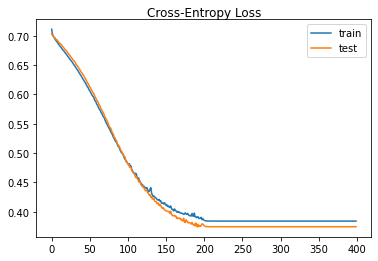

In [20]:
# Gráfico das curvas de aprendizagem da função Loss

#pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### <font color='blue'>Plot accuracy learning curves</font>

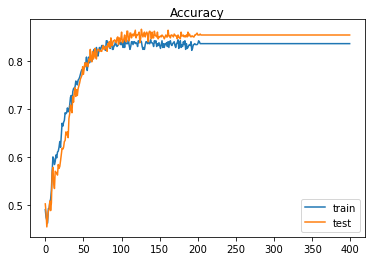

In [21]:
# Gráfico das curvas de aprendizagem da precisão (acurácia)

#pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**Para você:**

Tente executar este código com e sem a **tabela (programação) da taxa de aprendizado** e descrever o efeito que a programação (tabela) da taxa de aprendizado tem nas curvas de aprendizado durante o treinamento.